In [2]:
import networkx as nx
from community import community_louvain as cm
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.linalg import expm, sinm, cosm

In [3]:
def subgraph(A):
    "This returns the subgraph centrality matrix"
    from numpy import linalg as LA
    w, v = LA.eig(A)
    w=[l/max(w,key=abs) for l in w]
    expdiag=[np.exp(l) for l in w]
    intermediate=np.matmul(v,np.diag(expdiag))
    subgraphmat=np.matmul(intermediate,np.linalg.inv(v))
    subgraphmat=subgraphmat.real
    return subgraphmat;
   

In [4]:
# read yeast protein interaction file
g = nx.read_weighted_edgelist("4932.protein.links.v11.5.txt",comments="#",nodetype=str)

In [5]:
# thresholding
threshold_score = 750
for edge in g.edges: 
    weight = list(g.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        g.remove_edge(edge[0],edge[1])

In [6]:
#remove essential nodes
file = open("essential_nodes.txt")
for line in file.readlines():
    node = line.strip()
    if node in g:
        g.remove_node(node)
file.close()

In [7]:
#select largest component
largestcc = max(nx.connected_components(g),key=len)
g = g.subgraph(largestcc)
Adj = nx.to_numpy_array(g)
print('number of nodes of largest connected subgraph of g:',g.number_of_nodes())

number of nodes of largest connected subgraph of g: 4396


In [8]:
trials=20
SD=[]
for R in range(10,21):
    Ncomm=[]
    r=R/10
    for i in range(0,trials):
        partition = cm.best_partition(g,resolution=r)
        Ncomm.append(max(list(partition.values()))+1)
    SD.append(np.std(Ncomm))
        

In [1]:
SD

NameError: name 'SD' is not defined

In [1]:
freq_dict={}
max=100
for node in list(g.nodes()):
    freq_dict[node]=0
for i in range(0,max):
    # louvain partition
    partition = cm.best_partition(g)
    
    SOD1_module=partition['4932.YJR104C']

    for node in list(partition.keys()):
        if partition[node]==SOD1_module:
            freq_dict[node]=freq_dict[node]+1
freq_dict_filtered = dict((k, v) for k, v in freq_dict.items() if v > 0)

NameError: name 'g' is not defined

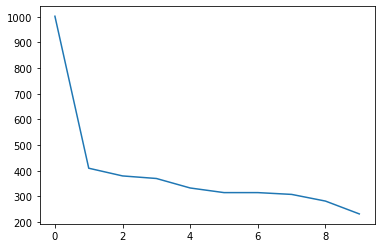

In [81]:
lengths=[]
for i in range(0,max):
    freq_dict_filtered = dict((k, v) for k, v in freq_dict.items() if v > i)
    lengths.append(len(freq_dict_filtered))
plt.plot(lengths)

In [71]:
threshold=80
freq_dict_filtered = dict((k, v) for k, v in freq_dict.items() if v > threshold)
len(freq_dict_filtered)

64

In [15]:
for r in range(10,21):
    print(r/10)

1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
